<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/Analitica_2/04_covid_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelando Transmisión de Covid 19

En este ejercicio se simulación, se modelará la transmisiónd el Covid 19 en una población. 

La transmisión de enfermedades infecciosas se suelen modelar utilizando un modelo matemático llamado el **SIR**. Este modelo tiene algunos supuestos:

- Sólo hay tres grupos en la población: Suceptibles, Infectados y Recuperados
- **Suceptibles ($S$):** Son personsas que pueden contraer la enfermedad
- **Infectados ($I$):** Son personas que portan la enfermedad y pueden transmitirla
- **Recuperados ($R$):** Personas que se recuperaron y son inmunes.

Con estos supuestos se puede modelar un sistema que recibe una infección para entender su transmisión. Basándonos en él podemos simular diferentes escenarios y tomar decisiones de política sobre qué hacer para atacar una crisis sanitaria.


## El Modelo SIR

El modelo analiza la evolución de los individuos en cada uno de los grupos. Se parte de una población inicial en la que se asume que todos son suceptibles a la enfermedad, algunos están infectados y nadie se ha recuperado aún. 

A continuación se describe cómo cambia el sistema de un día a otro. CDesde que llega la enfermedad, cada día hay nuevas personas infectándose, otras recuperándose, y otras que aún no se infectan. 

### Personas Suceptibles

Es la cantidad de personas que puede infectarse pero no lo ha hecho aún. Corresponde al total de personas de la población, menos los infectados, menos los recuperados.

$$ S = T - I - R $$

La cantidad de personas suceptibles tiende a disminuir a medida que avanza la enfermedad.

$$ S'(t) = - \beta S I, $$

donde $\beta$ corresponde a la *tasa de transmisión* de la enfermedad. Aquí se asume que las personas suceptibles tienen exposición a todas las personas infectadas y que se enferman con probabiliad $\beta$ después de la exposición.

### Personas Infectadas

La cantidad de personas infectadas es $I$. Este número comienza muy pequeño, crece a medida que avanza la enfermedad y luego vuelve a cero cuando todos se han recuperado. 

De un día a otro, cantidad de infectados evoluciona de acuerdo a, 

$$I'(t) = \beta SI - R.$$

De esta forma, la cantidad de personas infectadas depende de cuántos nuevos infectados hubo y cuántos infectados se recuperaron. 

### Personas Recuperadas

La cantidad de personas recuperadas sólo aumenta en el tiempo. Parte de 0 individuos hasta la totalidad de la población al final del periodo. Los recuperados crecen de a cuerdo a la siguiente ecuación, 

$$R'(t) = \gamma I.$$

Normalmente, se asume que las personas se recuperan después de cierta cantidad de días. Entre más rápido se recuperen las personas, menor duración tendrá la enfermedad.


Con los elementos anteriores se realizará una simulación para la propagación del covid 19 y se intentarán responder preguntas de política. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

En la siguiente celda, programe la evolución del sistema (S, I, R). 

In [2]:
def SIR_model(t, y, beta, gamma):
    """
    Esta función resuelve el modelo SIR para un tiempo dado t, condiciones iniciales y, tasa de transmisión beta y tasa de recuperación gamma.

    Params
    --------
      y : list
          Las condiciones iniciales (S, I, R).
      beta : float
          La tasa de transmisión.
      gamma : float
          La tasa de recuperación.

    Returns
    --------

      list
          Las derivadas de S, I y R con respecto al tiempo.

    """
    
    S, I, R = y
    ### Complete las derivadas del sistema

    dS_dt = - beta * S * I
    dI_dt = beta *  S * I - (gamma * I)
    dR_dt = gamma * I

    ### 
    return [dS_dt, dI_dt, dR_dt]



Si todo sale bien, la siguiente celda no debería arrojar error

In [3]:
y = (100, 1, 0)
beta = 0.01
gamma = 0.05
expected_derivatives = [-1.0, 0.95, 0.05]
actual_derivatives = SIR_model(0, y, beta, gamma)
assert actual_derivatives == expected_derivatives, 'Hay un error en la función'

A continuación se debe realizar la simulación de la evolución del sistema. En la siguiente función se realiza el cálculo para determinar cómo evoluciona el sistema. 

In [4]:
def run_simulation(beta, gamma, t_max, y0):
    """
    Esta función ejecuta una simulación del modelo SIR.

    Params
    --------
    beta : float
        La tasa de transmisión.
    gamma : float
        La tasa de recuperación.
    t_max : float
        El tiempo máximo de análisis

    y0 : list
        Las condiciones iniciales (S, I, R).

    Returns
    -------
      list
          La solución del modelo SIR.
    """
    t_eval = np.linspace(0, t_max, t_max + 1)
    solution = solve_ivp(SIR_model, (0, t_max), y0, args=(beta, gamma), t_eval=t_eval)
    return solution.y

Una vez definido el sistema y su evolución, es posible ver la trayectoria de la enfermedad para unos parámetros específicos. 

In [5]:
population_size = 10000
initial_infected = 10 # Al comenzar, hay 10 personas infectadas
initial_recovered = 0 # Aún no hay personas inmunes, pero puede cambiarse
initial_susceptible = population_size - initial_infected - initial_recovered

t_max = 200 # ¿Cuántos días veremos la evolución de la enfermedad?

beta = 0.2 # Tasa de Transmisión (entre más alto, más infecciosa)
gamma = 1/14 # Tasa de Recuperación (recuperación a los 14 días en promedio) 2 semanas para dejar de ser contagioso

# SIR como proporciones de la población
y0 = (initial_susceptible/population_size, initial_infected/population_size, initial_recovered/population_size)

In [6]:
 S, I, R = run_simulation(beta, gamma, t_max, y0)
 infected_trajectory = I * population_size

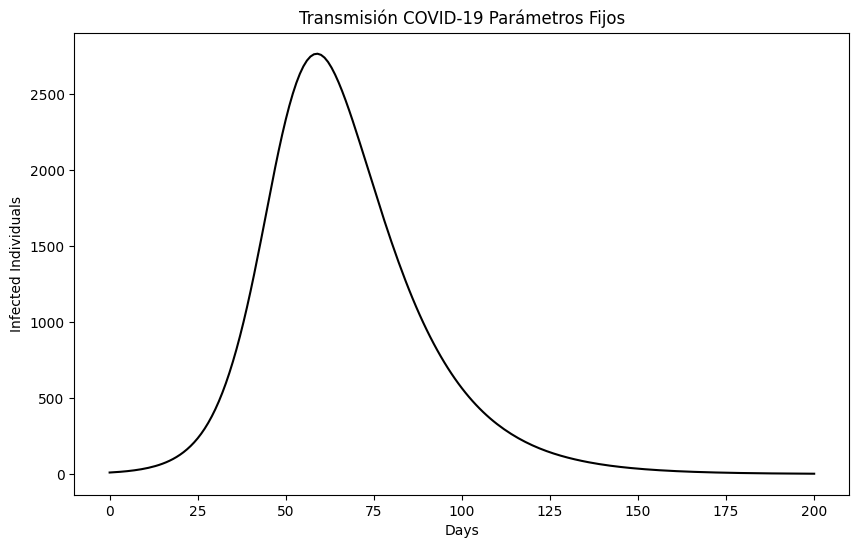

In [7]:

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(infected_trajectory.T, color='black')
plt.xlabel('Days')
plt.ylabel('Infected Individuals')
plt.title('Transmisión COVID-19 Parámetros Fijos')
plt.show()

Se recomienda probar otros parámetros para que evidencie cómo una mayor tasa de transmisión, o mayor tasa de recuperación pueden afectar la trayectoria de la infección

In [8]:
###
population_size = 10000
initial_infected = 10 # Al comenzar, hay 10 personas infectadas
initial_recovered = 0 # Aún no hay personas inmunes, pero puede cambiarse
initial_susceptible = population_size - initial_infected - initial_recovered

t_max = 200 # ¿Cuántos días veremos la evolución de la enfermedad?

beta = 0.5 # Tasa de Transmisión (entre más alto, más infecciosa)
gamma = 1/14 # Tasa de Recuperación (recuperación a los 14 días en promedio) 2 semanas para dejar de ser contagioso

###

# SIR como proporciones de la población
y0 = (initial_susceptible/population_size, initial_infected/population_size, initial_recovered/population_size)


In [9]:
 S, I, R = run_simulation(beta, gamma, t_max, y0)
 infected_trajectory = I * population_size

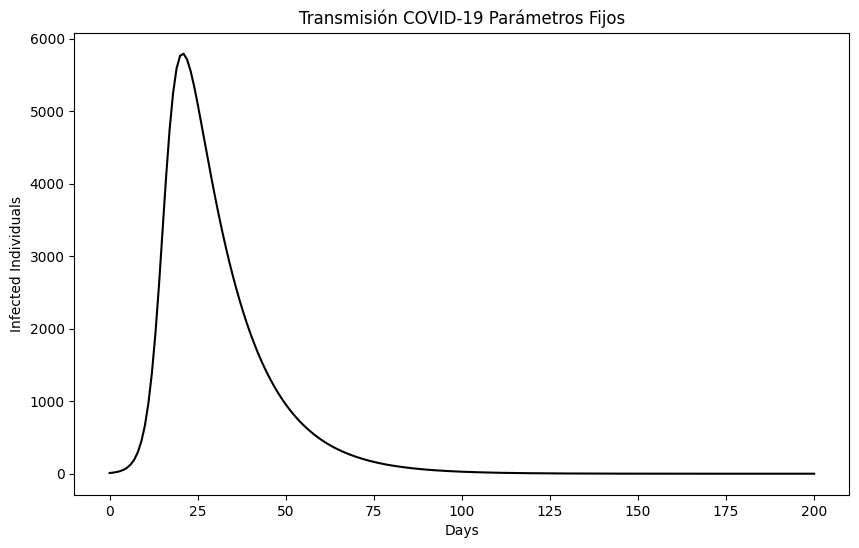

In [10]:

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(infected_trajectory.T, color='black')
plt.xlabel('Days')
plt.ylabel('Infected Individuals')
plt.title('Transmisión COVID-19 Parámetros Fijos')
plt.show()

# Simulaciones

A continuación se realizarán diferentes simulaciones para incorporar incertidumbre en los parámetros del modelo y ver cúales son los resultados más probables.

## Simulación 1 -- Incertidumbre en Tasa de Infección y Recupero

Debido a experiencias con enfermedades respiratorias, usted conoce que la tasa de transmisión suele estar entre 0.2 y 0.4. Es decir, la probabilidad de contagiarse al contacto con alguien infectado es de 20% a 40%. 

Adicionalmente, también conoce que en otros países, las personas que se enferman de covid demoran entre 12 y 18 días en recuperarse. 

Teniendo en cuenta lo anterior, realice 1000 simulaciones para las trayectorias de propagación de COVID 19 en una ciudad con una población de 100.000, en la cual llegaron 10 personas infectadas. 

In [11]:

# Parámetros
population_size = 10000
initial_infected = 10
initial_recovered = 0
initial_susceptible = population_size - initial_infected - initial_recovered

t_max = 200  

Para incluir incertidumbre en $\beta$ y $\gamma$ se recomienda utilizar la función [`np.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html), con la cual es posible generar números aleatorios tomando muestras de una distribución uniforme.

**Nota:** Recuerde que la tasa de recupero se puede definir como el inverso del número de días que toma recuperarse de la enfermedad.

In [12]:
n_simulations = 1000  # Number of Monte Carlo simulations


infected_trajectories = np.zeros((n_simulations, t_max + 1))
susceptible_trajectories = np.zeros((n_simulations, t_max + 1))
for i in range(n_simulations):

    ### Tome aleatoriamente un número entre 0.2 y 0.4 de una distribución uniforme
    import random
    beta = random.uniform(0.2, 0.4)
    ###

    ### Tome un número aleatorio de una distribución uniforme para la tasa de recupero 

    gamma = 1/random.uniform(12, 18)

    ###

    y0 = [initial_susceptible / population_size, initial_infected / population_size, initial_recovered / population_size]
    
    S, I, R = run_simulation(beta, gamma, t_max, y0)
    infected_trajectories[i, :] = I * population_size
    susceptible_trajectories[i, :] = S * population_size

Una vez simulada las 1000 trayectorias, es importante visualizar los resultados. 

Utilice la función [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) para graficar todas las trayectorias. 

Grafique la mediana y la media de las trayectorias también. 

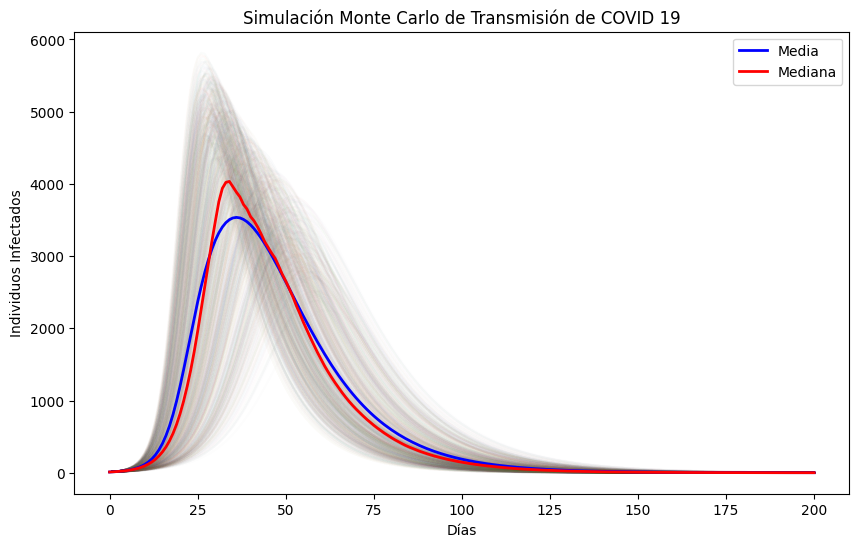

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot results
plt.figure(figsize=(10, 6))

### Gráfico de Trayectorias
### Se recomineda utilizar alpha = 0.01
for trajectory in infected_trajectories:
    plt.plot(trajectory, alpha=0.01)

###

### Gráfico de trayectoria mediana y media
# Calculate mean and median across trajectories for each day
mean_trajectory = np.mean(infected_trajectories, axis=0)
median_trajectory = np.median(infected_trajectories, axis=0)

# Plot mean and median lines
plt.plot(mean_trajectory, label='Media', linewidth=2, color='blue')
plt.plot(median_trajectory, label='Mediana', linewidth=2, color='red')

###

plt.xlabel('Días')
plt.ylabel('Individuos Infectados')
plt.title('Simulación Monte Carlo de Transmisión de COVID 19')
plt.legend()
plt.show()


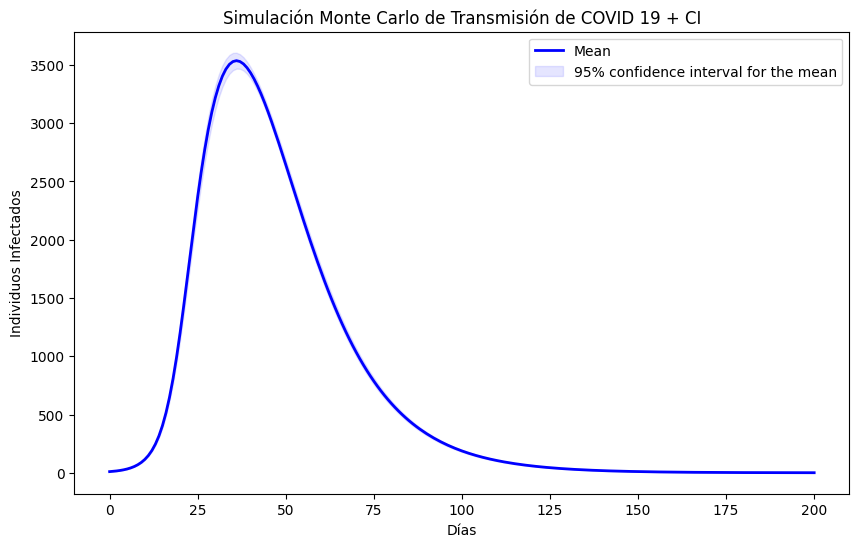

In [14]:
# Calculate the mean and the standard error of the mean
mean_trajectory = np.mean(infected_trajectories, axis=0)
sem_trajectory = np.std(infected_trajectories, axis=0) / np.sqrt(n_simulations)

# Calculate the lower and upper confidence intervals
lower_bound = mean_trajectory - (1.96 * sem_trajectory)
upper_bound = mean_trajectory + (1.96 * sem_trajectory)

plt.figure(figsize=(10, 6))
#plt.plot(infected_trajectories.T, color='gray', alpha=0.1)
plt.plot(mean_trajectory, color='blue', linewidth=2, label='Mean')
plt.fill_between(range(t_max + 1), lower_bound, upper_bound, color='blue', alpha=.1, label='95% confidence interval for the mean')
plt.xlabel('Días')
plt.ylabel('Individuos Infectados')
plt.title('Simulación Monte Carlo de Transmisión de COVID 19 + CI')
plt.legend()
plt.show()


# Simulación 2 -- Cuarentena

¿Qué pasaría si simuláramos una intervención en la cual se introdujera una cuarentena? ¿Qué efecto tendría en la transmisión de la enfermedad?

A continuación crearemos un modelo SIR que introduce el efecto de generar cuarentena durante un tiempo. El impacto de la cuarentena se modela como una reducción de la tasa de transmisión. 



In [15]:
def SIR_model_lockdown(t, y, beta, gamma, lockdown_start, lockdown_end, lockdown_effect):
    """
    Modelo SIR con cuarentena. 

    Params
    --------
      // igual que antes

      lockdown_start (int): 
        Un número que indica cuándo comienza la cuarentena

      lockdown_end (int)
        Un número que indica cuándo se acaba la cuarentena

      lockdown_effect (float):
        Un valor entre 0 y 1 que determina en cuánto se reduce la transmisión

    Returns
    ---------
      // igual que antes 

    """
    S, I, R = y
    
    ### Programe la reducción de la transmisión de la enfermedad entre `lockdown_start` y  `lockdown_end`.

    None

    ###

    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

def run_simulation_lockdown(beta, gamma, t_max, y0, lockdown_start, lockdown_end, lockdown_effect):
    t_eval = np.linspace(0, t_max, t_max + 1)
    solution = solve_ivp(SIR_model_lockdown, (0, t_max), y0, args=(beta, gamma, lockdown_start, lockdown_end, lockdown_effect), t_eval=t_eval)
    return solution.y


Simule el efecto de la cuarentena si se comienza en el día 25 y dura hasta el día 100. Suponga que la cuarentena disminuye la transmisión el 50%.

¿Cómo se compara con la transmisión sin cuarentena?

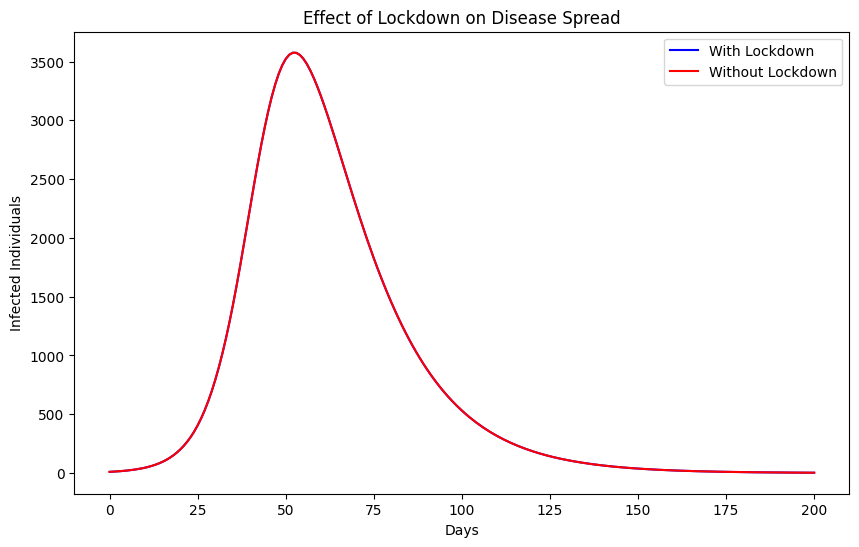

In [16]:
### Parámetros de la cuarentena

lockdown_start = 10
lockdown_end = 100 
lockdown_effect = 0.5 

###

# Simule una trayectoria

y0 = [initial_susceptible / population_size, initial_infected / population_size, initial_recovered / population_size]
S_lockdown, I_lockdown, R_lockdown = run_simulation_lockdown(beta, gamma, t_max, y0, lockdown_start, lockdown_end, lockdown_effect)
S, I, R = run_simulation(beta, gamma, t_max, y0)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(I_lockdown * population_size, color='blue', label='With Lockdown')
plt.plot(I * population_size, color='red', label='Without Lockdown')
plt.xlabel('Days')
plt.ylabel('Infected Individuals')
plt.title('Effect of Lockdown on Disease Spread')
plt.legend()
plt.show()


En estos escenarios, ¿cuál medida fue más efectiva? ¿Qué hubiera cambiado? 


A continuación, calcule la cantidad de personas que se han infectado en un momento $t$ para comparar la evolución de infectados a lo largo del tiempo. 

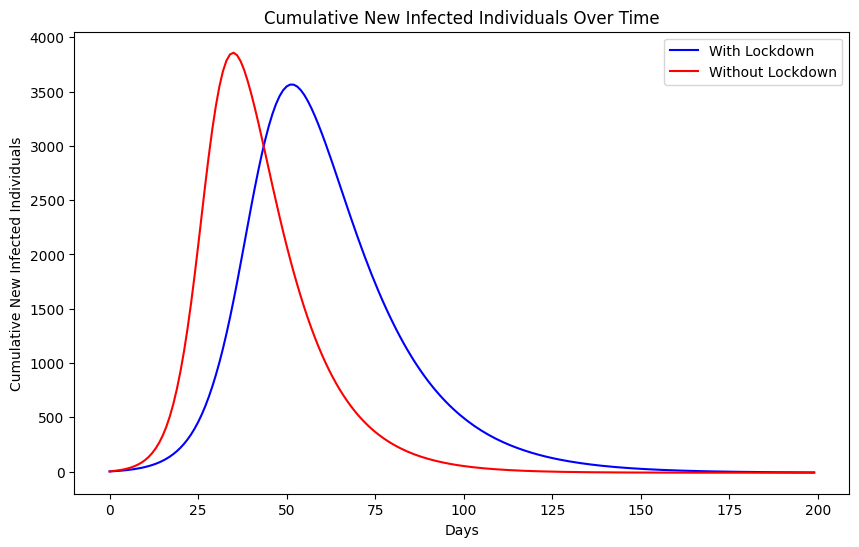

In [20]:
# Calculate cumulative new infections
daily_new_infections_lockdown = np.diff(I_lockdown * population_size)
infections_lockdown_cumulative = np.cumsum(daily_new_infections_lockdown)

daily_new_infections = np.diff(I * population_size)
infections_cumulative = np.cumsum(daily_new_infections)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(infections_lockdown_cumulative, color='blue', label='With Lockdown')
plt.plot(infections_cumulative, color='red', label='Without Lockdown')
plt.xlabel('Days')
plt.ylabel('Cumulative New Infected Individuals')
plt.title('Cumulative New Infected Individuals Over Time')
plt.legend()
plt.show()


## Monte Carlo

Nuevamente, no es recomendable quedarnos únicamente con una simulación... podemos aprender más y tener más confianza si realizamos muchas y generamo un intervalo de confianza.

In [21]:
# Arrays to store results
infected_trajectories_lockdown = np.zeros((n_simulations, t_max + 1))
infected_trajectories_no_lockdown = np.zeros((n_simulations, t_max + 1))




for i in range(n_simulations):
    beta = np.random.uniform(0.2, 0.4)
    gamma = 1 / np.random.uniform(12, 18)  
    y0 = [initial_susceptible / population_size, initial_infected / population_size, initial_recovered / population_size]
    
    # Simulación con Cuarentena
    S, I, R = run_simulation_lockdown(beta, gamma, t_max, y0, lockdown_start, lockdown_end, lockdown_effect)
    infected_trajectories_lockdown[i, :] = I * population_size

    
    # Simulación sin cuarentena
    S, I, R = run_simulation(beta, gamma, t_max, y0)
    infected_trajectories_no_lockdown[i, :] = I * population_size
 


Una vez simulada una gran cantidad de escenarios, se procede a calcular el intervalo de confianza. 

Recuerde que el intervalo de confianza del 95% está definido como 

$$\Big[ \bar{X} \pm 1.96 \times \frac{\sigma_x}{N} \Big]$$

**Nota:** Utilice la función `np.mean` para calcular el promedio y `np.std` para calcular la desviación estándar en cada punto del tiempo.

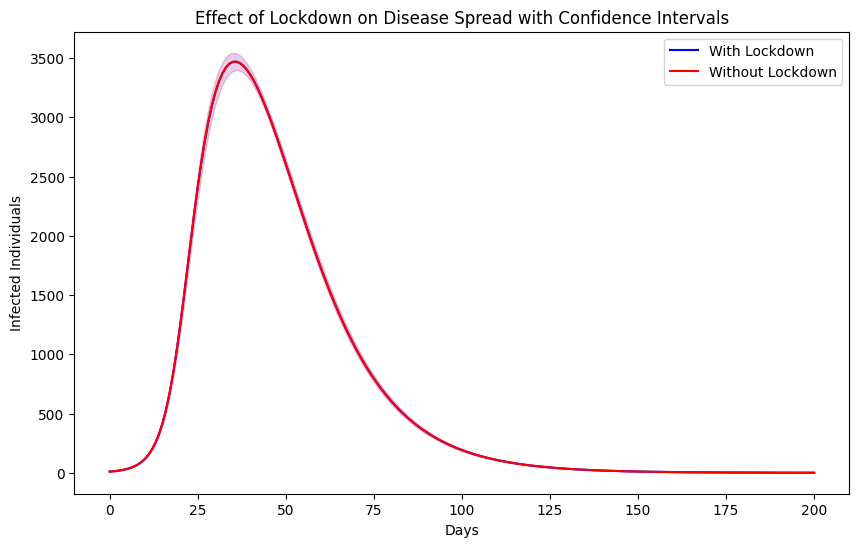

In [22]:
# Calculate mean and standard error for trajectories with lockdown
mean_trajectory_lockdown = infected_trajectories_lockdown.mean(axis=0)
sem_trajectory_lockdown = infected_trajectories_lockdown.std(axis=0) / np.sqrt(n_simulations)

# Calculate mean and standard error for trajectories without lockdown
mean_trajectory_no_lockdown = infected_trajectories_no_lockdown.mean(axis=0)
sem_trajectory_no_lockdown = infected_trajectories_no_lockdown.std(axis=0) / np.sqrt(n_simulations)

# Calculate confidence intervals
lower_bound_lockdown = mean_trajectory_lockdown - 1.96 * sem_trajectory_lockdown
upper_bound_lockdown = mean_trajectory_lockdown + 1.96 * sem_trajectory_lockdown

lower_bound_no_lockdown = mean_trajectory_no_lockdown - 1.96 * sem_trajectory_no_lockdown
upper_bound_no_lockdown = mean_trajectory_no_lockdown + 1.96 * sem_trajectory_no_lockdown

# Plot the results with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(mean_trajectory_lockdown, color='blue', label='With Lockdown')
plt.fill_between(range(t_max + 1), lower_bound_lockdown, upper_bound_lockdown, color='blue', alpha=.1)
plt.plot(mean_trajectory_no_lockdown, color='red', label='Without Lockdown')
plt.fill_between(range(t_max + 1), lower_bound_no_lockdown, upper_bound_no_lockdown, color='red', alpha=.1)
plt.xlabel('Days')
plt.ylabel('Infected Individuals')
plt.title('Effect of Lockdown on Disease Spread with Confidence Intervals')
plt.legend()
plt.show()
